In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
athlet=pd.read_csv(r'C:\Users\ELCOT\Documents\Data Science\Testing\Olympics\athlete_events.csv')
region=pd.read_csv(r'C:\Users\ELCOT\Documents\Data Science\Testing\Olympics\noc_regions.csv')

In [ ]:
athlete_df=athlet.merge(region,how='left',on='NOC')
athlete_df.head()

In [ ]:
athlete_df.rename(columns={'region':'Region','notes':'Notes'},inplace=True);
athlete_df.head()

In [ ]:
athlete_df.isnull().sum()

In [ ]:
athlete_df.query('Team=="India"').head()

In [ ]:
top10=athlete_df.Team.value_counts().sort_values(ascending=False).head(10)

In [ ]:
top10

In [ ]:
plt.figure(figsize=(12,6))
plt.title("...................")
sns.barplot(x=top10.index,y=top10,palette='Set2');

AttributeError: Rectangle.set() got an unexpected keyword argument 'egdecolor'

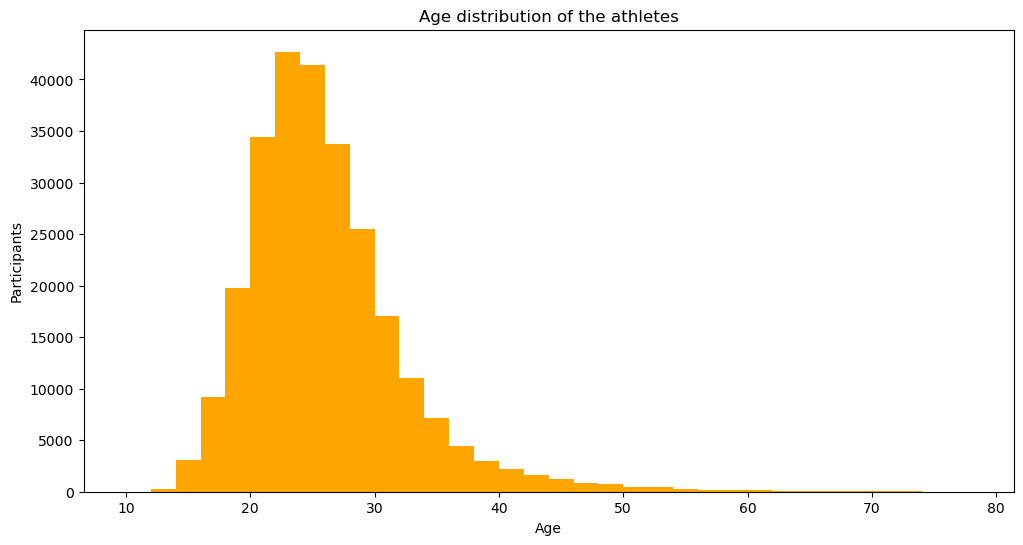

In [10]:
plt.figure(figsize=(12,6))
plt.title("Age distribution of the athletes")
plt.xlabel('Age')
plt.ylabel('Participants')
plt.hist(athlete_df.Age, bins =np.arange(10,80,2),color='Orange',egdecolor='white');

In [ ]:
winter=athlete_df[athlete_df.Season=='Winter'].Sport.unique()
winter

In [ ]:
athlete_df.query('Season=="Winter"').head(5)

In [ ]:
gender=athlete_df.Sex.value_counts()
gender

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender,labels=gender.index,autopct='%1.1f%%',startangle=150,shadow=True);

In [ ]:
#Total Metals
athlete_df.Medal.value_counts()

In [ ]:
#Total no. of females in Olympics
femathletes=athlete_df[(athlete_df.Sex=='F')&(athlete_df.Season=='Summer')]
femathletes=femathletes.groupby('Year').count().reset_index()
femathletes.head()

In [ ]:
womenolympics=athlete_df[(athlete_df.Sex=='F')&(athlete_df.Season=='Summer')]
womenolympics

In [ ]:
#Women Olympics
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=womenolympics,palette="Spectral")
plt.title("Women In Olympics")

In [ ]:
#Line Graph for Women in Olympics
participants=womenolympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
participants.loc[:,'F'].plot()
plt.title('Plot of Female Athletes')

In [ ]:
#Gold Medals
gold=athlete_df[(athlete_df.Medal=='Gold')]
gold.head()

In [ ]:
#gold medals beyond age 60
gold['ID'][gold['Age']>60].count()

In [ ]:
#Finding the sport which hold the Gold Medal
sport=gold['Sport'][gold['Age']>60]
sport

In [ ]:
#plot
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sport)
plt.title('Sport in Gold Medal')

In [ ]:
#count of Gold at each country
gold.Region.value_counts().reset_index(name='Medal').head(5)

In [ ]:
#plot of count of gold at each country
totalgold=gold.Region.value_counts().reset_index(name='Medal').head(5)
g=sns.catplot(x="index",y="Medal",data=totalgold,height=5,kind="bar",palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 5 Countries")
g.set_ylabels("number of medals")
plt.title("Gold medals per country")

In [ ]:
#Recent Olympics
max_year=athlete_df.Year.max()
print(max_year)
team_names=athlete_df[(athlete_df.Year==max_year)&(athlete_df.Medal=='Gold')].Team
team_names.value_counts().head()

In [ ]:
#plot for recent olymbics
sns.barplot(x=team_names.value_counts().head(20),y=team_names.value_counts().head(20).index)
plt.xlabel('Country Medals for 2016')
plt.ylabel(None)

In [ ]:
#filter the height of Male & Female who won Medals
not_null=athlete_df[(athlete_df['Height'].notnull())&(athlete_df['Weight'].notnull())]
not_null

In [ ]:
#plot the filter the height of Male & Female who won Medals
plt.figure(figsize=(12,10))
axis=sns.scatterplot(x='Height',y='Weight',data=not_null,hue='Sex')
plt.title("Height vs Weight")